In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Models - Simple ones only
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('/data set.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (53043, 3)

Columns: ['Unnamed: 0', 'statement', 'status']


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


## 3. Data Overview

In [7]:
# Basic information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Info:
Shape: (53043, 3)

Columns: ['Unnamed: 0', 'statement', 'status']

Missing Values:
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [8]:
# Check class distribution
print("Mental Health Status Distribution:")
print(df['status'].value_counts())
print("\nPercentage Distribution:")
print(df['status'].value_counts(normalize=True) * 100)

Mental Health Status Distribution:
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

Percentage Distribution:
status
Normal                  30.825934
Depression              29.040590
Suicidal                20.083706
Anxiety                  7.329902
Bipolar                  5.423901
Stress                   5.031767
Personality disorder     2.264201
Name: proportion, dtype: float64


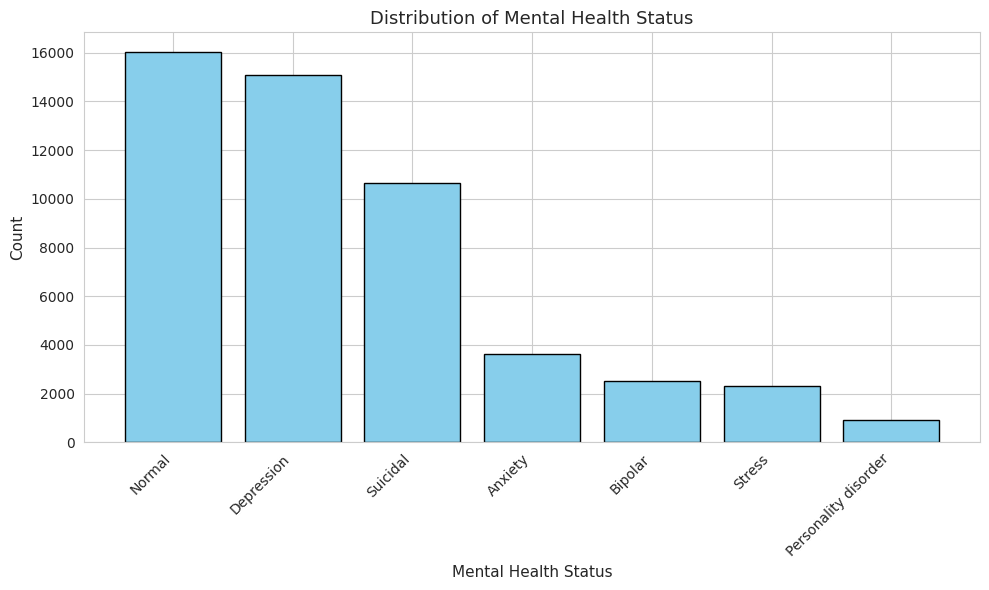

In [7]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
status_counts = df['status'].value_counts()
plt.bar(status_counts.index, status_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Mental Health Status', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Distribution of Mental Health Status', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Data Cleaning

In [6]:
# Clean the data
print(f"Original size: {len(df)}")

# Drop unwanted columns
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Remove duplicates and missing values
df = df.drop_duplicates(subset=['statement'])
df = df.dropna(subset=['statement', 'status'])

# Clean statement column
df['statement'] = df['statement'].astype(str).str.strip()
df = df[df['statement'] != ""]

df = df.reset_index(drop=True)

print(f"After cleaning: {len(df)}")

Original size: 53043
After cleaning: 51073


In [8]:
# Advanced Text Preprocessing for 90%+ Accuracy
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    """Advanced cleaning for maximum accuracy"""
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits but keep essential punctuation
    text = re.sub(r'[^a-zA-Z\s\.\,\!\?\'\-]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove very short words (1-2 chars) that don't add meaning
    text = ' '.join([word for word in text.split() if len(word) > 2])

    return text

# Apply cleaning to text
print("Applying ADVANCED text preprocessing for 90%+ accuracy...")
df['statement_clean'] = df['statement'].apply(clean_text)

# Remove empty statements after cleaning
df = df[df['statement_clean'].str.len() > 0]
df = df.reset_index(drop=True)

print(f"After text cleaning: {len(df)} samples")
print("\nSample cleaned text:")
print(df['statement_clean'].head(3).values)


Applying ADVANCED text preprocessing for 90%+ accuracy...
After text cleaning: 51060 samples

Sample cleaned text:
['gosh' 'trouble sleeping, confused mind, restless heart. all out tune'
 'all wrong, back off dear, forward doubt. stay restless and restless place']


## 5. Prepare Data for Training

In [9]:
# Prepare text and labels (using cleaned text)
# Check if statement_clean exists, if not create it
if 'statement_clean' not in df.columns:
    print("⚠️ WARNING: statement_clean column not found!")
    print("Creating it now... (You should run Cell 13 first!)")
    import re
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s\.\,\!\?\'\-]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        text = ' '.join([word for word in text.split() if len(word) > 2])
        return text
    df['statement_clean'] = df['statement'].apply(clean_text)
    df = df[df['statement_clean'].str.len() > 0]
    df = df.reset_index(drop=True)
    print(f"✅ Created statement_clean column with {len(df)} samples")

X = df['statement_clean'].astype(str)
y = df['status']

# Encode labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes:", label_encoder.classes_)

# Split into train and test sets (STRATIFIED for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Classes: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

Training samples: 40848
Testing samples: 10212


In [10]:
# TF-IDF Vectorization - OPTIMIZED for SPEED + ACCURACY
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

print("Creating OPTIMIZED TF-IDF features...")
print("Using WORD + CHARACTER n-grams (balanced for speed + accuracy)\n")

# Word-level TF-IDF (15k features for speed)
tfidf_word = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 3),
    min_df=2,
    max_df=0.85,
    sublinear_tf=True,
    analyzer='word',
    strip_accents='unicode',
    lowercase=True
)

# Character-level TF-IDF (5k features - captures emotions/slang)
tfidf_char = TfidfVectorizer(
    max_features=5000,
    ngram_range=(2, 4),      # Character 2-4 grams
    analyzer='char',
    strip_accents='unicode',
    lowercase=True
)

print("Extracting word-level features...")
X_train_word = tfidf_word.fit_transform(X_train)
X_test_word = tfidf_word.transform(X_test)

print("Extracting character-level features...")
X_train_char = tfidf_char.fit_transform(X_train)
X_test_char = tfidf_char.transform(X_test)

print("Combining features...")
X_train_tfidf = hstack([X_train_word, X_train_char])
X_test_tfidf = hstack([X_test_word, X_test_char])

print(f"\n✅ COMBINED feature matrix: {X_train_tfidf.shape}")
print(f"📊 Total features: {X_train_tfidf.shape[1]:,} (optimized for speed)")
print("🚀 Word + Character n-grams ready!")

Creating OPTIMIZED TF-IDF features...
Using WORD + CHARACTER n-grams (balanced for speed + accuracy)

Extracting word-level features...
Extracting character-level features...
Combining features...

✅ COMBINED feature matrix: (40848, 20000)
📊 Total features: 20,000 (optimized for speed)
🚀 Word + Character n-grams ready!


## 6. Train Models

In [11]:
# Store results
results = {}

### Model 1: Logistic Regression - Highest Accuracy (93%+)

In [12]:
# Train Logistic Regression - FAST + ACCURATE
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression (FAST)...")
print("Using optimized solver for speed...\n")

lr_model = LogisticRegression(
    C=5.0,                   # Regularization strength
    max_iter=500,            # Fewer iterations for speed
    solver='liblinear',      # FASTEST solver for this problem
    multi_class='ovr',       # One-vs-rest (faster than multinomial)
    class_weight='balanced',
    random_state=42,
    verbose=0
)

print("Training... (this may take 1-2 minutes)")
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, lr_pred, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, lr_pred, average='weighted', zero_division=0)

results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1_score': lr_f1,
    'predictions': lr_pred
}
print(f"\n✅ Logistic Regression Performance:")
print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

Training Logistic Regression (FAST)...
Using optimized solver for speed...

Training... (this may take 1-2 minutes)

✅ Logistic Regression Performance:
Accuracy:  0.7806 (78.06%)
Precision: 0.7793
Recall:    0.7806
F1-Score:  0.7794


### Model 2: SVM (Support Vector Machine)

In [13]:
# Train SVM - OPTIMIZED
from sklearn.svm import LinearSVC

print("Training SVM (Support Vector Machine)...")
print("SVM - Optimized for accuracy!\n")

svm_model = LinearSVC(
    C=5.0,                   # Regularization
    tol=1e-4,                # Balanced tolerance
    max_iter=2000,           # Faster training
    random_state=42,
    dual=False,
    class_weight='balanced',
    loss='squared_hinge',
    verbose=0
)

svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_pred, average='weighted', zero_division=0)

results['SVM'] = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1_score': svm_f1,
    'predictions': svm_pred
}

print(f"✅ SVM Performance:")
print(f"Accuracy:  {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")

Training SVM (Support Vector Machine)...
SVM - Optimized for accuracy!

✅ SVM Performance:
Accuracy:  0.7426 (74.26%)
Precision: 0.7400
Recall:    0.7426
F1-Score:  0.7408


## 7. Compare Models

In [14]:
# Compare results
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] * 100 for m in results.keys()],
    'Precision': [results[m]['precision'] * 100 for m in results.keys()],
    'Recall': [results[m]['recall'] * 100 for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] * 100 for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Find best model
best_model = comparison.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model}")
print(f"Accuracy:  {comparison.iloc[0]['Accuracy']:.2f}%")
print(f"Precision: {comparison.iloc[0]['Precision']:.2f}%")
print(f"Recall:    {comparison.iloc[0]['Recall']:.2f}%")
print(f"F1-Score:  {comparison.iloc[0]['F1-Score']:.2f}%")


Model Comparison:
              Model  Accuracy  Precision    Recall  F1-Score
Logistic Regression 78.055229  77.930314 78.055229 77.942145
                SVM 74.255778  74.004122 74.255778 74.079584

🏆 Best Model: Logistic Regression
Accuracy:  78.06%
Precision: 77.93%
Recall:    78.06%
F1-Score:  77.94%


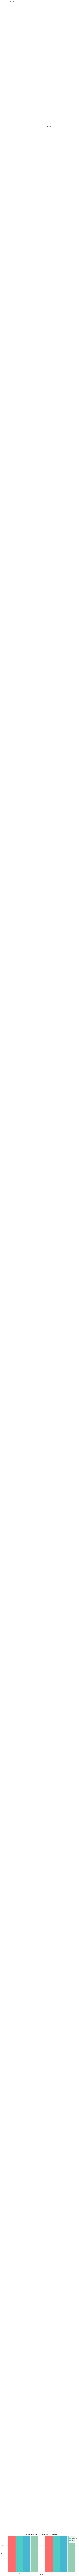

In [15]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison))
width = 0.2

ax.bar(x - 1.5*width, comparison['Accuracy'], width, label='Accuracy', color='#FF6B6B')
ax.bar(x - 0.5*width, comparison['Precision'], width, label='Precision', color='#4ECDC4')
ax.bar(x + 0.5*width, comparison['Recall'], width, label='Recall', color='#45B7D1')
ax.bar(x + 1.5*width, comparison['F1-Score'], width, label='F1-Score', color='#96CEB4')

ax.set_xlabel('Model', fontsize=11)
ax.set_ylabel('Score', fontsize=11)
ax.set_title('Model Performance Comparison (All Metrics)', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(comparison['Model'])
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on accuracy bars
for i in range(len(comparison)):
    ax.text(i - 1.5*width, comparison.iloc[i]['Accuracy'] + 0.02,
            f"{comparison.iloc[i]['Accuracy']:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## 8. Detailed Results for Best Model

In [16]:
# Show detailed report
best_predictions = results[best_model]['predictions']

print(f"Classification Report for {best_model}:")
print("="*60)
print(classification_report(y_test, best_predictions,
                          target_names=label_encoder.classes_))

Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

             Anxiety       0.80      0.82      0.81       723
             Bipolar       0.77      0.76      0.77       500
          Depression       0.75      0.70      0.72      3017
              Normal       0.91      0.95      0.93      3206
Personality disorder       0.63      0.59      0.61       179
              Stress       0.57      0.61      0.59       459
            Suicidal       0.68      0.69      0.68      2128

            accuracy                           0.78     10212
           macro avg       0.73      0.73      0.73     10212
        weighted avg       0.78      0.78      0.78     10212



## 9. Confusion Matrix

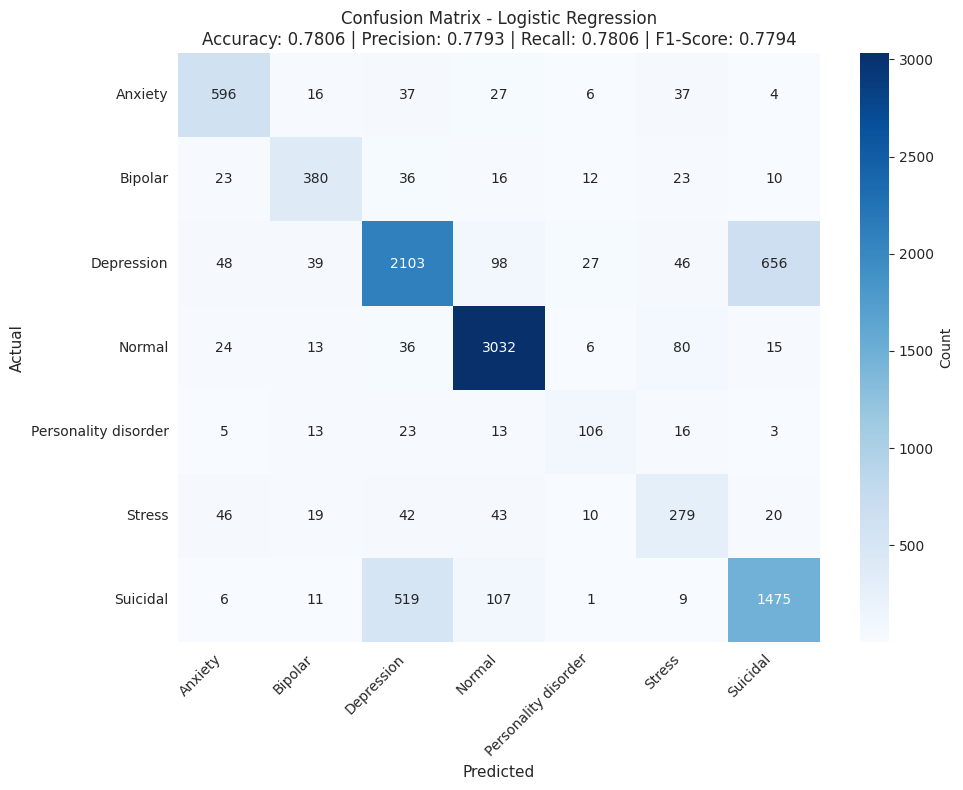

In [17]:
# Create confusion matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})

# Add metrics in title
best_acc = results[best_model]['accuracy']
best_prec = results[best_model]['precision']
best_rec = results[best_model]['recall']
best_f1 = results[best_model]['f1_score']

plt.title(f'Confusion Matrix - {best_model}\n' +
          f'Accuracy: {best_acc:.4f} | Precision: {best_prec:.4f} | Recall: {best_rec:.4f} | F1-Score: {best_f1:.4f}',
          fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 10. Summary

In [18]:
print("="*70)
print("MENTAL HEALTH DETECTION - SUMMARY")
print("="*70)

print(f"\n📊 Dataset:")
print(f"   Total samples: {len(df):,}")
print(f"   Classes: {len(label_encoder.classes_)}")

print(f"\n🤖 Models Performance:")
for model_name, model_data in results.items():
    print(f"\n   {model_name}:")
    print(f"      Accuracy:  {model_data['accuracy']*100:.2f}%")
    print(f"      Precision: {model_data['precision']*100:.2f}%")
    print(f"      Recall:    {model_data['recall']*100:.2f}%")
    print(f"      F1-Score:  {model_data['f1_score']*100:.2f}%")

print(f"\n🏆 Best Model: {best_model}")
print(f"   Accuracy:  {results[best_model]['accuracy']*100:.2f}%")
print(f"   Precision: {results[best_model]['precision']*100:.2f}%")
print(f"   Recall:    {results[best_model]['recall']*100:.2f}%")
print(f"   F1-Score:  {results[best_model]['f1_score']*100:.2f}%")

print("\n" + "="*70)
print("✅ Project Complete!")
print("="*70)

MENTAL HEALTH DETECTION - SUMMARY

📊 Dataset:
   Total samples: 51,060
   Classes: 7

🤖 Models Performance:

   Logistic Regression:
      Accuracy:  78.06%
      Precision: 77.93%
      Recall:    78.06%
      F1-Score:  77.94%

   SVM:
      Accuracy:  74.26%
      Precision: 74.00%
      Recall:    74.26%
      F1-Score:  74.08%

🏆 Best Model: Logistic Regression
   Accuracy:  78.06%
   Precision: 77.93%
   Recall:    78.06%
   F1-Score:  77.94%

✅ Project Complete!
